# Demographic Data Analysis

In this analysis we are focusing on analyzing and finding correlations between the three important metrics by countries,i.e., birth rate, internet users and income group.

## Exploring Dataset

Let's explore the dataset that we have to understand the variables in a better way.

### Importing Libraries & Settings

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,5

import seaborn as sns
sns.set_theme()

### Importing Data

In [2]:
demographic_data = pd.read_csv("../01_DATA/demographic_data.csv", index_col=None)
demographic_data.head()

,Country Name,Country Code,Birth Rate,Internet Users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


### Data Profiling

In [3]:
# Viewing the shape of data

demographic_data.shape

(195, 5)

In [4]:
# Viewing the metadata info

demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth Rate      195 non-null    float64
 3   Internet Users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [5]:
# Checking uniqueness of countries

country_uniqueness = demographic_data["Country Name"].is_unique
country_unique_count = demographic_data["Country Name"].nunique()

if country_uniqueness == True:
    print(f"The list of countries in the dataframe is unique and number of unique countries present is: {country_unique_count}")
else:
    print(f"The list of countries in the dataframe is not unique and number of unique countries present is: {country_unique_count}")


The list of countries in the dataframe is unique and number of unique countries present is: 195


In [6]:
# Checking details of numerical columns:

demographic_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Birth Rate,195.0,21.469928,10.605467,7.9,12.1205,19.68,29.7595,49.6610
Internet Users,195.0,42.076471,29.030788,0.9,14.5200,41.00,66.2250,96.5468


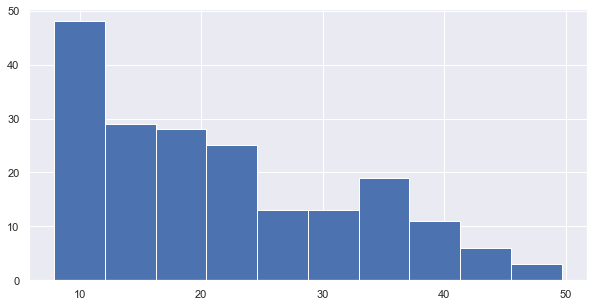

In [7]:
# Viewing the distribution of "Birth Rate"

demographic_data["Birth Rate"].hist();

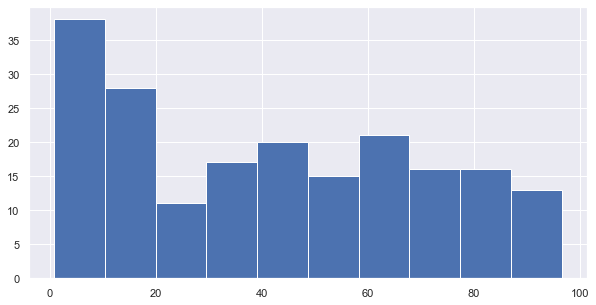

In [8]:
# Viewing the distribution of "Internet Users"

demographic_data["Internet Users"].hist();

In [9]:
# List of unique income groups

list(demographic_data["Income Group"].unique())

['High income', 'Low income', 'Upper middle income', 'Lower middle income']

### Filtering the DataFrame

We can slice the dataframe to view a certain player's data on a particular year.

#### Viewing the Top-10 Countries by Birth Rate

In [10]:
demographic_data[["Country Name", "Birth Rate"]].nlargest(10,"Birth Rate")

,Country Name,Birth Rate
127,Niger,49.661
2,Angola,45.985
167,Chad,45.745
11,Burundi,44.151
115,Mali,44.138
156,Somalia,43.891
178,Uganda,43.474
65,"Gambia, The",42.525
192,"Congo, Dem. Rep.",42.394
14,Burkina Faso,40.551


#### Viewing the Bottom-10 Countries by Birth Rate

In [11]:
demographic_data[["Country Name", "Birth Rate"]].nsmallest(10,"Birth Rate")

,Country Name,Birth Rate
74,"Hong Kong SAR, China",7.900
142,Portugal,7.900
89,Japan,8.200
45,Germany,8.500
68,Greece,8.500
86,Italy,8.500
95,"Korea, Rep.",8.600
146,Romania,8.800
19,Bosnia and Herzegovina,9.062
53,Spain,9.100


#### Viewing the Top-10 Countries by Internet Users

In [12]:
demographic_data[["Country Name", "Internet Users"]].nlargest(10,"Internet Users")

,Country Name,Internet Users
84,Iceland,96.54680
22,Bermuda,95.30000
131,Norway,95.05340
163,Sweden,94.78360
47,Denmark,94.62970
130,Netherlands,93.95640
102,Liechtenstein,93.80000
106,Luxembourg,93.77650
56,Finland,91.51440
17,Bahrain,90.00004


#### Viewing the Bottom-10 Countries by Internet Users

In [13]:
demographic_data[["Country Name", "Internet Users"]].nsmallest(10,"Internet Users")

,Country Name,Internet Users
52,Eritrea,0.9
172,Timor-Leste,1.1
11,Burundi,1.3
156,Somalia,1.5
64,Guinea,1.6
117,Myanmar,1.6
127,Niger,1.7
154,Sierra Leone,1.7
55,Ethiopia,1.9
192,"Congo, Dem. Rep.",2.2


#### Viewing Demographic Details of India

In [14]:
country_name = "India"

country_filter = demographic_data["Country Name"] == country_name

filtered_data = demographic_data[country_filter]

filtered_data.iloc[0]

Country Name                    India
Country Code                      IND
Birth Rate                     20.291
Internet Users                   15.1
Income Group      Lower middle income
Name: 80, dtype: object

### Creating a function to filter the dataframe

In [15]:
def country_details(country_name: str):
    
    country_filter = demographic_data["Country Name"] == country_name
    filtered_data = demographic_data[country_filter]
    return filtered_data.iloc[0]

#### Viewing Demographic Details of United States

In [16]:
country_details("United States")

Country Name      United States
Country Code                USA
Birth Rate                 12.5
Internet Users             84.2
Income Group        High income
Name: 181, dtype: object

#### Count of Countries by Income Groups 

In [17]:
grouped_data = demographic_data.groupby("Income Group")["Income Group"].count()
grouped_data

Income Group
High income            67
Low income             30
Lower middle income    50
Upper middle income    48
Name: Income Group, dtype: int64

#### Visualizing the Number of Countries by Income Groups

We can visualize the `grouped data` as follows:

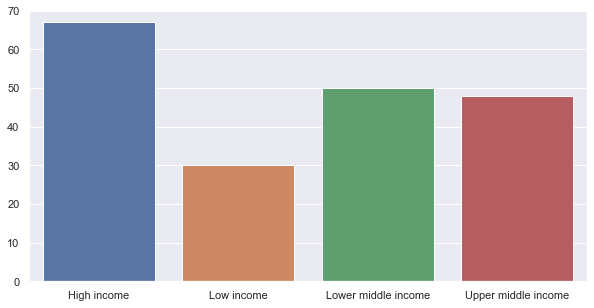

In [18]:
x_axis = list(grouped_data.index)
y_axis = list(grouped_data)

countries_by_income_group = sns.barplot(x=x_axis, y=y_axis, )

## Analyzing Data

Visualizing the dataset provides a better way to analyze the data and we can leverage the `seaborn` library to effectively visualize the data to get valuable insights

#### Analyzing Distribution of Birth Rate

The below chart shows the distribution of "Birth Rate" along of KDE plot

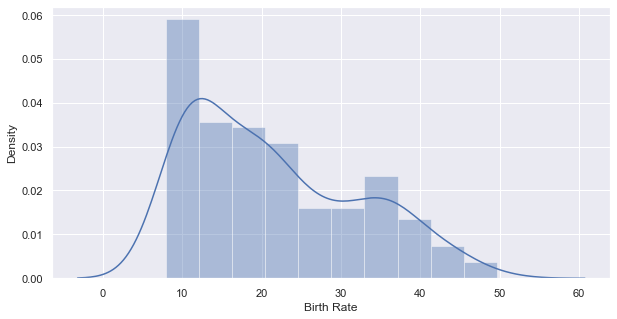

In [19]:
birth_rate_dist = sns.distplot(demographic_data["Birth Rate"], bins=10)

##### 💡 Insight
- The birth rate distribution can be seen as right-skewed and most of the countries have a birth rate between 10 & 20

#### Analyzing Distribution of Birth Rate

The below chart shows the distribution of "Internet Users" along of KDE plot

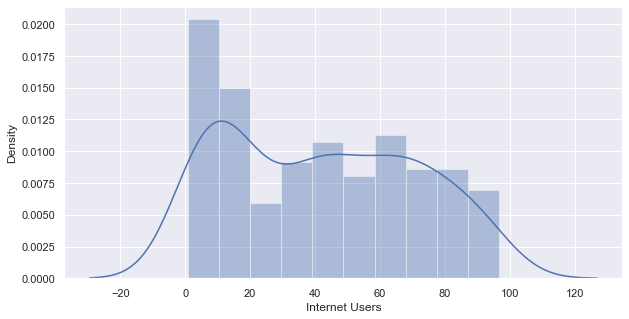

In [20]:
internet_users_dist = sns.distplot(demographic_data["Internet Users"], bins=10)

##### 💡 Insight
- The distribution is kind of flat but, we can see an initial spike in 0-20 bin of internet users

#### Analyzing Birth Rate by Income Group

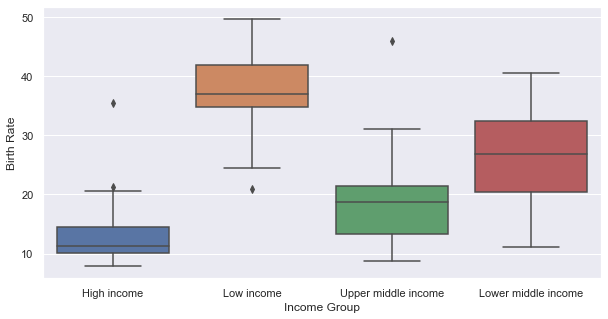

In [21]:
birth_rate_by_income_group = sns.boxplot(data=demographic_data, x="Income Group", y="Birth Rate")

##### 💡 Insight
- We can clearly see that countries falling in lower income group has the higher birth rates and as we move upwards in terms of income; the birth rate decreases

#### Analyzing Internet Users by Income Group

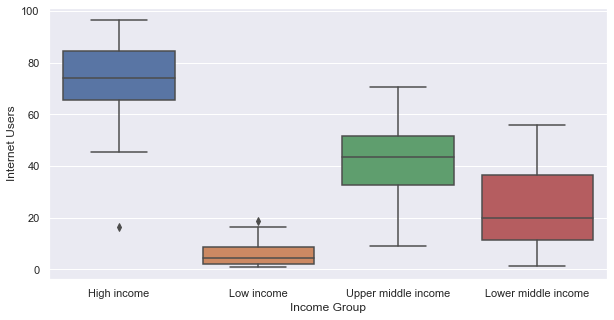

In [22]:
birth_rate_by_income_group = sns.boxplot(data=demographic_data, x="Income Group", y="Internet Users")

##### 💡 Insight
- Unlike birth rate; we can see that internet users increases with the increase in income; therefore, countries with high income has most internet users and that of with low income has the least number of internet users

#### Analyzing Correlation between Birth Rate and Internet Users

The following visual plots all the countries in scatter plot; so that we can exactly see where a country falls in-terms of internet users and birth rates.

The scatter plot is colored by "Income Group" labels, so that, we can also visualize the income group of a particular country

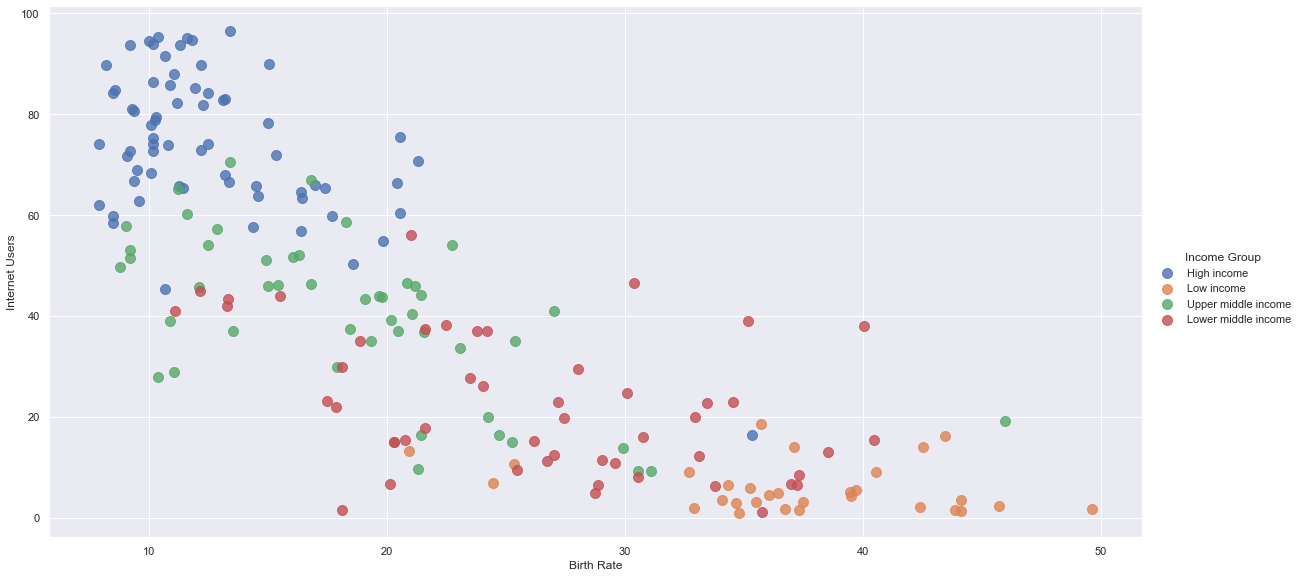

In [23]:
correl_scatter_plt = sns.lmplot(
    data=demographic_data, x="Birth Rate", y="Internet Users", hue="Income Group", 
    fit_reg=False, aspect=2, size=8, scatter_kws={"s": 100})

##### 💡 Insight
- The visualization shows an inverse relation between the birth rate and internet users and we can see countries with lower birth rates has more internet users and vice-versa